In [201]:
import numpy as np
import pandas as pd 
import scipy as sp
import scipy.io
from scipy.stats import norm
from scipy.stats import multivariate_normal
from scipy.signal import find_peaks
from datetime import datetime
from matplotlib.dates import date2num, datestr2num


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



import os
import glob
import fnmatch
import re

In [2]:
df_Xerunlist = pd.read_csv('./XeArapucaRunList.csv', sep = ';')
df_Xerunlist.head()

,Run Number,Config,Day/time,Comments,Efield
0,10872,CRT_noprescale_delay_Feb00003,06/02/2020,First run after solving the noise problem. All...,False
1,10873,CRT_noprescale_delay_Feb00003,06/02/2020,Started using CRT trigger. Biases for channels...,False
2,10874,CRT_noprescale_delay_Feb00003,06/02/2020,"Biases for channels 0,6 and 8 to 11 of SSP 504...",False
3,10875,CRT_noprescale_delay_Feb00003,06/02/2020,Biases for channels 0 to 7 of SSP 504 brought ...,False
4,10877,XeDope_CRT_noprescale_delay_Feb00002,06/02/2020,New config with lower disc thresholds (70 ADC ...,False


In [283]:
df_Xerunlist.loc[(df_Xerunlist['Efield']==True)]['Run Number'].values

array([11008, 11009, 11010, 11011, 11012, 11024, 11025, 11032, 11035,
       11036, 11038, 11089, 11090, 11091, 11093, 11140, 11142, 11143,
       11203, 11205, 11206, 11206])

In [ ]:
11297
11298
11299
11306
11308
11311
11312
11313
11314
11317
11320
11321
11334
11339
11340

In [ ]:
11008', '11009', '11010', '11011', '11012', '11024', '11025', '11032', '11035', '11036', '11038', '11089', '11090', '11091', '11093', '11140', '11142', '11143', '11203', '11205', '11206', '11271', '11272', '11273', '11289', '11297', '11298', '11299', '11306', '11308', '11311', '11312', '11313', '11314', '11317', '11320', '11321', '11334', '11339', '11340'

In [3]:
## add tiem infos
df_Xetimelist = pd.read_csv('./timeinfos.txt', sep = '\t', header=None, names={'Run Number', 'daytime'})

df_Xetimelist['daytime'] = pd.to_datetime(df_Xetimelist['daytime'])
df_Xetimelist.head()

,Run Number,daytime
0,10872,2020-02-06 13:51:48+00:00
1,10873,2020-02-06 14:03:28+00:00
2,10874,2020-02-06 14:25:00+00:00
3,10875,2020-02-06 15:38:58+00:00
4,10877,2020-02-06 16:06:42+00:00


In [4]:
df_Xetimelist = df_Xetimelist.sort_values(by=['Run Number'] ).drop_duplicates(ignore_index = True)
df_Xetimelist.shape

(106, 2)

In [5]:
df_tmp = pd.merge(df_Xerunlist, df_Xetimelist, how = 'inner', on=['Run Number'])
df_tmp.head(2)

,Run Number,Config,Day/time,Comments,Efield,daytime
0,10872,CRT_noprescale_delay_Feb00003,06/02/2020,First run after solving the noise problem. All...,False,2020-02-06 13:51:48+00:00
1,10873,CRT_noprescale_delay_Feb00003,06/02/2020,Started using CRT trigger. Biases for channels...,False,2020-02-06 14:03:28+00:00


In [6]:
df_Xerunlist_info = df_tmp[['Run Number', 'Day/time', 'daytime', 'Efield']]
df_Xerunlist_info['Day/time'] = pd.to_datetime(df_Xerunlist_info['Day/time'], format='%d/%m/%Y')
#df_Xerunlist_info['Day/time'] = df_Xerunlist_info['Day/time'].dt.strftime('%d %b')
df_Xerunlist_info.tail()

,Run Number,Day/time,daytime,Efield
90,11264,2020-05-18,2020-05-18 01:56:25+00:00,False
91,11265,2020-05-18,2020-05-18 12:56:43+00:00,False
92,11269,2020-05-19,2020-05-18 21:59:25+00:00,False
93,11270,2020-05-19,2020-05-19 08:14:45+00:00,False
94,11271,2020-05-20,2020-05-19 20:28:58+00:00,False


In [7]:
def readfile_list(filename_list):       
    
    def read_single_file(f):
        data = pd.read_csv(f, index_col=0)
        return data
    
    data_list = [read_single_file(f) for f in filename_list]
    return pd.concat(data_list, axis=0)

In [8]:
#read APA 3 files 

base_path_wfapa3 = '/Users/bordoni/protoDUNE/XeDoping/Arapuca/fnal_results/infiles08052020_mod304/wf'
file_path_wfapa3 = os.path.join(base_path_wfapa3,'CalibWaveforms_run*.csv')

file_name_list_wfapa3 =  glob.glob(file_path_wfapa3) 
df_wfapa3 = readfile_list(file_name_list_wfapa3)
df_wfapa3.rename(columns={'Run number': 'Run Number'}, inplace=True)
df_wfapa3.head()

,Run Number,Ch,24,25,26,27,28,29,30,31,...,2018,2019,2020,2021,2022,2023,n good evts,pe area_mean,pe area_std,f_cal
0,10903,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.053257,1.044044,1.031924,1.024351,1.011604,0.996404,2500,479.742961,157.147799,1.000000
1,10903,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.930004,0.923963,0.921665,0.924782,0.919475,0.910667,2763,480.990643,158.020421,1.002601
2,10903,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.260157,-0.260974,-0.256672,-0.256263,-0.259511,-0.255381,1548,480.188428,152.783426,1.000929
3,10903,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.854682,1.846442,1.841040,1.831534,1.819506,1.808836,3115,502.774537,163.942098,1.048008
4,10903,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.690791,0.684948,0.679756,0.676448,0.670439,0.663329,3801,484.567914,161.076343,1.010057


In [102]:
df_goodwf_apa3 = pd.merge(df_Xerunlist_info, df_wfapa3, how = 'inner', on=['Run Number'])
df_goodwf_apa3.head()

,Run Number,Day/time,daytime,Efield,Ch,24,25,26,27,28,...,2018,2019,2020,2021,2022,2023,n good evts,pe area_mean,pe area_std,f_cal
0,10877,2020-02-06,2020-02-06 16:06:42+00:00,False,0,NaN,NaN,NaN,NaN,NaN,...,0.292631,0.284171,0.276857,0.270907,0.264296,0.257675,3081,489.968068,159.806797,1.000000
1,10877,2020-02-06,2020-02-06 16:06:42+00:00,False,1,NaN,NaN,NaN,NaN,NaN,...,1.287621,1.377379,1.475485,1.568502,1.660079,1.759033,3098,472.398410,158.004998,0.964141
2,10877,2020-02-06,2020-02-06 16:06:42+00:00,False,2,NaN,NaN,NaN,NaN,NaN,...,0.529557,0.542969,0.560243,0.576848,0.595928,0.615357,3347,488.991947,156.059397,0.998008
3,10877,2020-02-06,2020-02-06 16:06:42+00:00,False,3,NaN,NaN,NaN,NaN,NaN,...,0.161501,0.157214,0.154950,0.152204,0.152477,0.150936,2058,494.233581,160.738243,1.008706
4,10877,2020-02-06,2020-02-06 16:06:42+00:00,False,4,NaN,NaN,NaN,NaN,NaN,...,0.457186,0.450145,0.450819,0.449599,0.445494,0.440017,2662,482.778255,156.120687,0.985326


In [10]:
wiredrun = [10928, 10940, 10948, 10949, 10952, 10954, 10959, 10960 ]

In [40]:
df_apa3_wiredrun = df_goodwf_apa3[df_goodwf_apa3['Run Number'].isin(wiredrun)]
df_apa3_wiredrun.head()

,Run Number,Day/time,daytime,Efield,Ch,24,25,26,27,28,...,2018,2019,2020,2021,2022,2023,n good evts,pe area_mean,pe area_std,f_cal
144,10928,2020-02-11,2020-02-11 17:37:52+00:00,False,0,NaN,NaN,NaN,NaN,NaN,...,0.848423,0.837628,0.832446,0.829395,0.823134,0.814442,3551,478.060073,159.899828,1.000000
145,10928,2020-02-11,2020-02-11 17:37:52+00:00,False,1,NaN,NaN,NaN,NaN,NaN,...,-0.127202,-0.131450,-0.131980,-0.129399,-0.130754,-0.132957,10945,478.421711,157.298356,1.000756
146,10928,2020-02-11,2020-02-11 17:37:52+00:00,False,2,NaN,NaN,NaN,NaN,NaN,...,0.815000,0.810934,0.801614,0.800064,0.796465,0.787867,3117,481.603482,155.947877,1.007412
147,10928,2020-02-11,2020-02-11 17:37:52+00:00,False,3,NaN,NaN,NaN,NaN,NaN,...,1.147657,1.134821,1.123424,1.116605,1.106176,1.097870,2736,493.683631,157.685353,1.032681
148,10928,2020-02-11,2020-02-11 17:37:52+00:00,False,4,NaN,NaN,NaN,NaN,NaN,...,0.749770,0.740570,0.736427,0.734868,0.731519,0.726203,4465,480.664332,163.566208,1.005448


In [19]:
df_apa3_stat = df_apa3_wiredrun[['Run Number', 'Day/time', 'Ch',  'n good evts']]
df_apa3_stat.head()

,Run Number,Day/time,Ch,n good evts
144,10928,2020-02-11,0,3551
145,10928,2020-02-11,1,10945
146,10928,2020-02-11,2,3117
147,10928,2020-02-11,3,2736
148,10928,2020-02-11,4,4465


Text(0.5, 1.0, 'Good Events per Run and Channel')

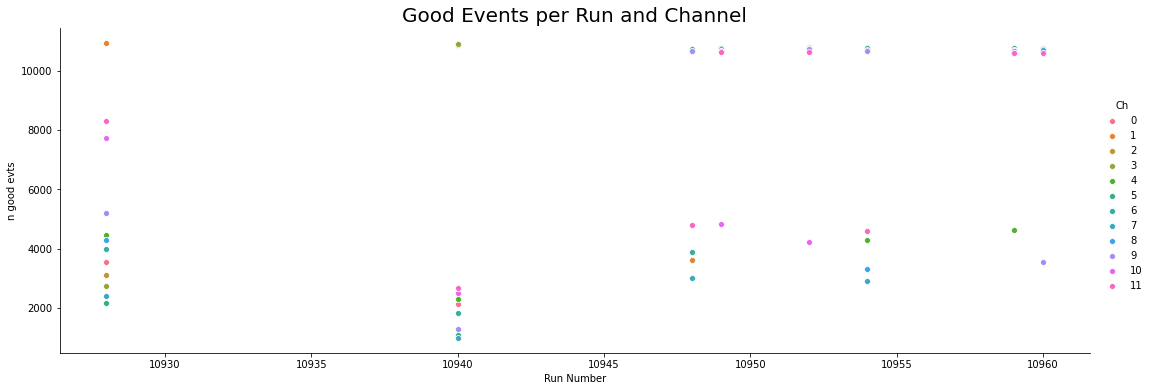

In [39]:
import seaborn as sns

b = sns.pairplot(x_vars=['Run Number'], y_vars=['n good evts'], data=df_apa3_stat, hue='Ch',  height=5, aspect=3)
plt.title('Good Events per Run and Channel', fontsize =20)


## Draw some waveform per Channel


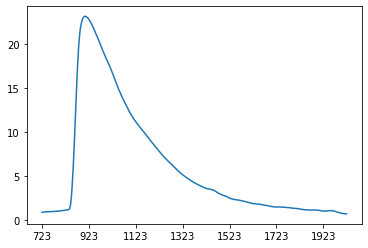

In [246]:
df_apa3_ch = df_goodwf_apa3.copy()
df_apa3_ch = df_apa3_ch.groupby(['Run Number','Ch']).sum()
df_apa3_ch.head()
#df_apa3_ch.index
df_apa3_ch.loc[(10947,1)][700:2000].plot()

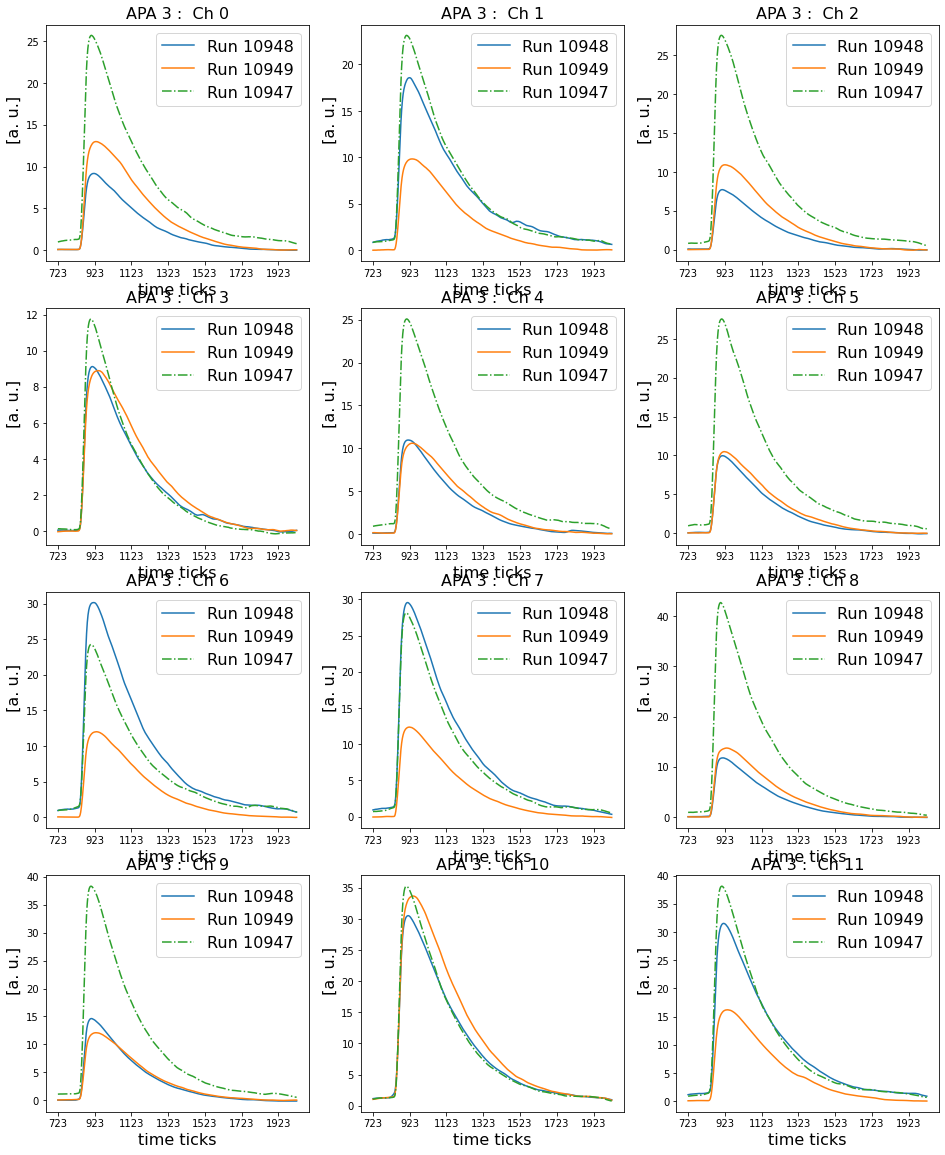

In [274]:
fig = plt.figure(figsize=(16,20))
plt.title('APA 3 : average waveforms per channel', fontsize=16)



ax1=plt.subplot2grid((4,3), (0,0))
plt.title('APA 3 :  Ch 0', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,0)][700:2000].plot(ax=ax1, label= 'Run 10948')
df_apa3_ch.loc[(10949,0)][700:2000].plot(ax=ax1, label= 'Run 10949')
df_apa3_ch.loc[(10947,0)][700:2000].plot(ax=ax1, label= 'Run 10947', linestyle = '-.')


plt.legend(fontsize=16)


#ax1=plt.subplot(342)
ax2=plt.subplot2grid((4,3), (0,1))
plt.title('APA 3 :  Ch 1', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,1)][700:2000].plot(ax=ax2, label= 'Run 10948')
df_apa3_ch.loc[(10949,1)][700:2000].plot(ax=ax2, label= 'Run 10949')
df_apa3_ch.loc[(10947,1)][700:2000].plot(ax=ax2, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(343)
ax3=plt.subplot2grid((4,3), (0,2))
plt.title('APA 3 :  Ch 2', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,2)][700:2000].plot(ax=ax3, label= 'Run 10948')
df_apa3_ch.loc[(10949,2)][700:2000].plot(ax=ax3, label= 'Run 10949')
df_apa3_ch.loc[(10947,2)][700:2000].plot(ax=ax3, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(344)
ax4=plt.subplot2grid((4,3), (1,0))
plt.title('APA 3 :  Ch 3', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,3)][700:2000].plot(ax=ax4, label= 'Run 10948')
df_apa3_ch.loc[(10949,3)][700:2000].plot(ax=ax4, label= 'Run 10949')
df_apa3_ch.loc[(10947,3)][700:2000].plot(ax=ax4, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(345)
ax5=plt.subplot2grid((4,3), (1,1))
plt.title('APA 3 :  Ch 4', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,4)][700:2000].plot(ax=ax5, label= 'Run 10948')
df_apa3_ch.loc[(10949,4)][700:2000].plot(ax=ax5, label= 'Run 10949')
df_apa3_ch.loc[(10947,4)][700:2000].plot(ax=ax5, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(346)
ax6=plt.subplot2grid((4,3), (1,2))
plt.title('APA 3 :  Ch 5', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,5)][700:2000].plot(ax=ax6, label= 'Run 10948')
df_apa3_ch.loc[(10949,5)][700:2000].plot(ax=ax6, label= 'Run 10949')
df_apa3_ch.loc[(10947,5)][700:2000].plot(ax=ax6, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(347)
ax7=plt.subplot2grid((4,3), (2,0))
plt.title('APA 3 :  Ch 6', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,6)][700:2000].plot(ax=ax7, label= 'Run 10948')
df_apa3_ch.loc[(10949,6)][700:2000].plot(ax=ax7, label= 'Run 10949')
df_apa3_ch.loc[(10947,6)][700:2000].plot(ax=ax7, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(348)
ax8=plt.subplot2grid((4,3), (2,1))
plt.title('APA 3 :  Ch 7', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,7)][700:2000].plot(ax=ax8, label= 'Run 10948')
df_apa3_ch.loc[(10949,7)][700:2000].plot(ax=ax8, label= 'Run 10949')
df_apa3_ch.loc[(10947,7)][700:2000].plot(ax=ax8, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(349)
ax9=plt.subplot2grid((4,3), (2,2))
plt.title('APA 3 :  Ch 8', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,8)][700:2000].plot(ax=ax9, label= 'Run 10948')
df_apa3_ch.loc[(10949,8)][700:2000].plot(ax=ax9, label= 'Run 10949')
df_apa3_ch.loc[(10947,8)][700:2000].plot(ax=ax9, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


#ax1=plt.subplot(3410)
ax10=plt.subplot2grid((4,3), (3,0))
plt.title('APA 3 :  Ch 9', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,9)][700:2000].plot(ax=ax10, label= 'Run 10948')
df_apa3_ch.loc[(10949,9)][700:2000].plot(ax=ax10, label= 'Run 10949')
df_apa3_ch.loc[(10947,9)][700:2000].plot(ax=ax10, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


ax11=plt.subplot2grid((4,3), (3,1))
plt.title('APA 3 :  Ch 10', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,10)][700:2000].plot(ax=ax11, label= 'Run 10948')
df_apa3_ch.loc[(10949,10)][700:2000].plot(ax=ax11, label= 'Run 10949')
df_apa3_ch.loc[(10947,10)][700:2000].plot(ax=ax11, label= 'Run 10947', linestyle = '-.')


ax12=plt.subplot2grid((4,3), (3,2))
plt.title('APA 3 :  Ch 11', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(10948,11)][700:2000].plot(ax=ax12, label= 'Run 10948')
df_apa3_ch.loc[(10949,11)][700:2000].plot(ax=ax12, label= 'Run 10949')
df_apa3_ch.loc[(10947,11)][700:2000].plot(ax=ax12, label= 'Run 10947', linestyle = '-.')

plt.legend(fontsize=16)


plt.show()
fig.savefig('./APA3_1stdopinginvest.pdf')








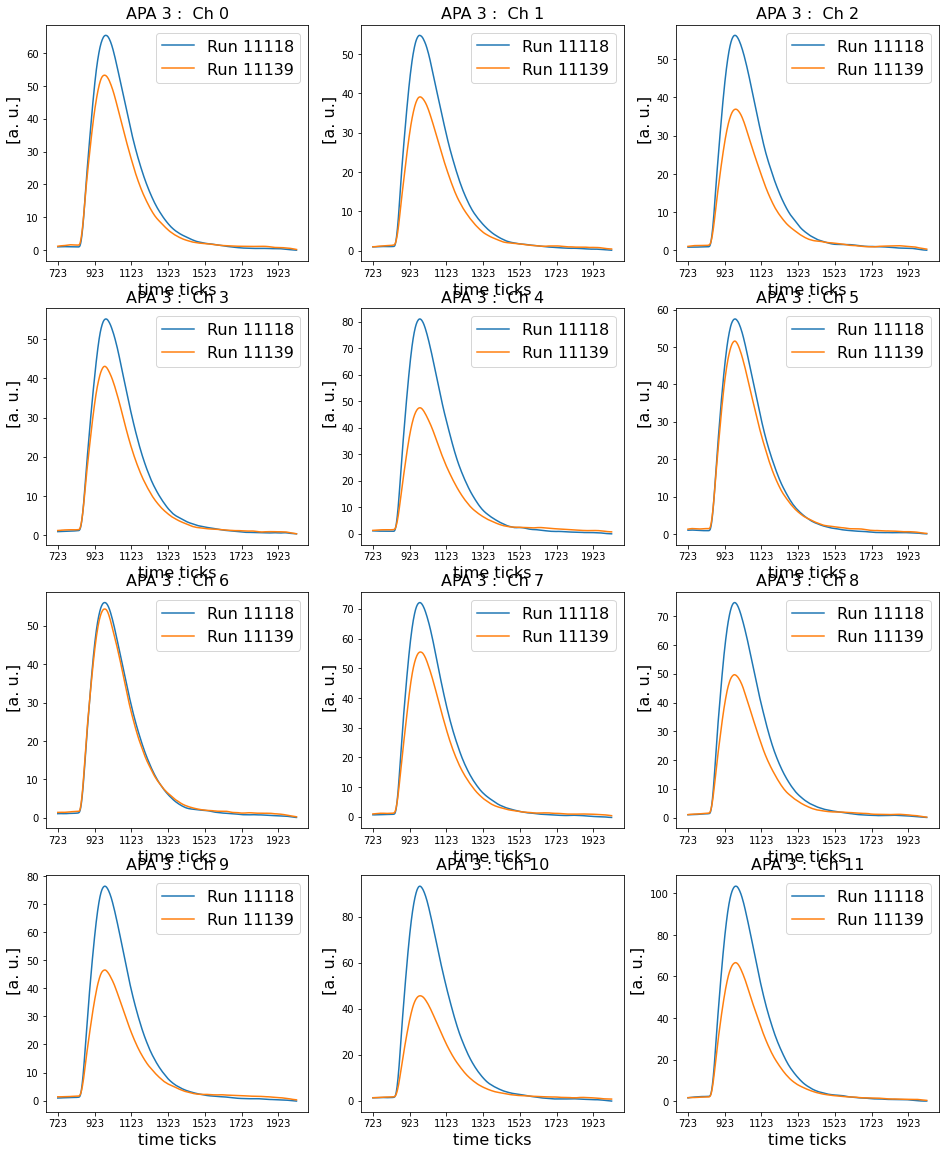

In [277]:
fig = plt.figure(figsize=(16,20))
plt.title('APA 3 : average waveforms per channel', fontsize=16)



ax1=plt.subplot2grid((4,3), (0,0))
plt.title('APA 3 :  Ch 0', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,0)][700:2000].plot(ax=ax1, label= 'Run 11118')
df_apa3_ch.loc[(11139,0)][700:2000].plot(ax=ax1, label= 'Run 11139')


plt.legend(fontsize=16)


#ax1=plt.subplot(342)
ax2=plt.subplot2grid((4,3), (0,1))
plt.title('APA 3 :  Ch 1', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,1)][700:2000].plot(ax=ax2, label= 'Run 11118')
df_apa3_ch.loc[(11139,1)][700:2000].plot(ax=ax2, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(343)
ax3=plt.subplot2grid((4,3), (0,2))
plt.title('APA 3 :  Ch 2', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,2)][700:2000].plot(ax=ax3, label= 'Run 11118')
df_apa3_ch.loc[(11139,2)][700:2000].plot(ax=ax3, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(344)
ax4=plt.subplot2grid((4,3), (1,0))
plt.title('APA 3 :  Ch 3', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,3)][700:2000].plot(ax=ax4, label= 'Run 11118')
df_apa3_ch.loc[(11139,3)][700:2000].plot(ax=ax4, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(345)
ax5=plt.subplot2grid((4,3), (1,1))
plt.title('APA 3 :  Ch 4', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,4)][700:2000].plot(ax=ax5, label= 'Run 11118')
df_apa3_ch.loc[(11139,4)][700:2000].plot(ax=ax5, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(346)
ax6=plt.subplot2grid((4,3), (1,2))
plt.title('APA 3 :  Ch 5', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,5)][700:2000].plot(ax=ax6, label= 'Run 11118')
df_apa3_ch.loc[(11139,5)][700:2000].plot(ax=ax6, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(347)
ax7=plt.subplot2grid((4,3), (2,0))
plt.title('APA 3 :  Ch 6', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,6)][700:2000].plot(ax=ax7, label= 'Run 11118')
df_apa3_ch.loc[(11139,6)][700:2000].plot(ax=ax7, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(348)
ax8=plt.subplot2grid((4,3), (2,1))
plt.title('APA 3 :  Ch 7', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,7)][700:2000].plot(ax=ax8, label= 'Run 11118')
df_apa3_ch.loc[(11139,7)][700:2000].plot(ax=ax8, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(349)
ax9=plt.subplot2grid((4,3), (2,2))
plt.title('APA 3 :  Ch 8', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,8)][700:2000].plot(ax=ax9, label= 'Run 11118')
df_apa3_ch.loc[(11139,8)][700:2000].plot(ax=ax9, label= 'Run 11139')

plt.legend(fontsize=16)


#ax1=plt.subplot(3410)
ax10=plt.subplot2grid((4,3), (3,0))
plt.title('APA 3 :  Ch 9', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,9)][700:2000].plot(ax=ax10, label= 'Run 11118')
df_apa3_ch.loc[(11139,9)][700:2000].plot(ax=ax10, label= 'Run 11139')

plt.legend(fontsize=16)


ax11=plt.subplot2grid((4,3), (3,1))
plt.title('APA 3 :  Ch 10', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,10)][700:2000].plot(ax=ax11, label= 'Run 11118')
df_apa3_ch.loc[(11139,10)][700:2000].plot(ax=ax11, label= 'Run 11139')


ax12=plt.subplot2grid((4,3), (3,2))
plt.title('APA 3 :  Ch 11', fontsize=16)
plt.xlabel('time ticks', fontsize=16, ma='right')
plt.ylabel('         [a. u.]', fontsize=16)
df_apa3_ch.loc[(11118,11)][700:2000].plot(ax=ax12, label= 'Run 11118')
df_apa3_ch.loc[(11139,11)][700:2000].plot(ax=ax12, label= 'Run 11139')

plt.legend(fontsize=16)


plt.show()
fig.savefig('./APA3_aprilinvest.pdf')


In [180]:
df_tot_wf   = df_goodwf_apa3.groupby('Run Number').sum().reset_index()
#df_tmp = df_goodwf_apa3['Day/time']
#df_tot_wf = pd.concat([df_tmp, df_tot_wf], axis=1)
df_tot_wf.loc[(df_tot_wf['Run Number'] > 10947) & (df_tot_wf['Run Number'] < 10950)]




,Run Number,Efield,Ch,24,25,26,27,28,29,30,...,2018,2019,2020,2021,2022,2023,n good evts,pe area_mean,pe area_std,f_cal
20,10948,0.0,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.414549,3.379878,3.348540,3.318140,3.301974,3.266958,94949,5472.195941,1964.739503,11.581442
21,10949,0.0,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.921908,0.903055,0.887102,0.877363,0.859073,0.843329,122615,5450.262500,1931.321873,11.464527


In [214]:
def conv_col(col):
    try:
        return int(col)
    except ValueError:
        return col

df_tot_wf.columns = df_tot_wf.columns.map(conv_col)

In [265]:
wf = list(range(700, 2000))
rowin = list(range(24, 2024))
df_tot_wf[wf]

,700,701,702,703,704,705,706,707,708,709,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,7.159022,7.178191,7.215369,7.257940,7.303227,7.312412,7.357323,7.394137,7.407811,7.431093,...,6.785521,6.722574,6.687092,6.648029,6.592312,6.563642,6.517387,6.482147,6.439260,6.412585
1,6.693789,6.738117,6.772546,6.813603,6.857089,6.909863,6.949815,6.994754,7.032042,7.077087,...,5.206381,5.112741,5.033902,4.919689,4.819476,4.720688,4.635338,4.549291,4.457512,4.359417
2,5.601563,5.681440,5.733822,5.809962,5.895251,5.973334,6.074285,6.174255,6.253072,6.346402,...,7.089125,7.067328,7.056447,7.027622,7.009782,6.986544,6.967724,6.947280,6.922727,6.876284
3,6.220238,6.244681,6.258158,6.290566,6.313959,6.336301,6.388596,6.420166,6.454198,6.477780,...,3.669824,3.591681,3.520967,3.431841,3.361661,3.276329,3.213068,3.147821,3.061770,2.986843
4,5.655966,5.699202,5.744202,5.800249,5.851153,5.909296,5.971826,6.045636,6.099751,6.175529,...,5.375161,5.431677,5.495349,5.528659,5.565246,5.608529,5.657714,5.690795,5.705988,5.710360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,9.934512,9.945708,9.953160,9.950757,9.969406,9.988894,9.988683,9.985690,9.988642,9.986259,...,3.130105,3.087206,3.046942,3.005542,2.954840,2.913243,2.869699,2.806945,2.765250,2.709921
82,10.024593,10.043501,10.059359,10.060059,10.075997,10.068037,10.081052,10.072873,10.079781,10.081976,...,-0.332193,-0.387063,-0.430103,-0.476065,-0.549982,-0.602185,-0.678932,-0.739427,-0.802385,-0.852765
83,12.734348,12.792800,12.873380,12.968766,13.040684,13.116451,13.188103,13.232526,13.284417,13.340479,...,-0.077939,-0.159636,-0.228632,-0.292192,-0.353774,-0.445186,-0.500926,-0.577000,-0.641066,-0.695910
84,11.812156,11.826285,11.852643,11.885428,11.901993,11.913373,11.929420,11.946130,11.964116,11.985514,...,4.746695,4.674966,4.607187,4.534799,4.489631,4.447376,4.395185,4.332639,4.267691,4.215554


In [234]:
df_int = df_tot_wf[wf].sum(axis=1).to_frame().rename(columns={0:'Integral'})
df_int.loc[(df_tot_wf['Run Number'] > 10947) & (df_tot_wf['Run Number'] < 10950)]

,Integral
20,74183.961470
21,60056.148187


In [235]:
#df_date = df_goodwf_apa3['Day/time']
#df_tmp = pd.concat([df_date, df_tot_wf], axis=1)
#df_tot_wf = df_tmp.copy()

df_apa3_efieldON  = df_tot_wf.loc[(df_tot_wf['Efield'] == 12)]
df_apa3_efieldOFF = df_tot_wf.loc[(df_tot_wf['Efield'] == 0)]


In [236]:
df_apa3_efieldON

,Run Number,Efield,Ch,24,25,26,27,28,29,30,...,2018,2019,2020,2021,2022,2023,n good evts,pe area_mean,pe area_std,f_cal
54,11140,12.0,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.833466,-1.795249,-1.782102,-1.976953,-1.842175,-1.847818,406,5801.952511,1844.710855,11.727132
55,11142,12.0,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.670791,-3.712245,-3.755853,-3.750684,-3.774307,-3.993953,610,5654.810888,1712.957669,10.999330
56,11143,12.0,66,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.989004,1.008728,1.103960,1.191882,1.225273,1.277470,1891,5555.351643,1837.099579,12.048689


In [237]:
#df_apa3_efieldOFF[['Day/time', 'Run Number']]
df_apa3_efieldOFF['Run Number']

0     10877
1     10878
2     10879
3     10885
4     10903
      ...  
81    11262
82    11264
83    11265
84    11269
85    11271
Name: Run Number, Length: 83, dtype: int64

In [266]:
df_efieldON_int  = df_apa3_efieldON[rowin].sum(axis=1).to_frame().rename(columns={0:'Integral'})
df_efieldOFF_int = df_apa3_efieldOFF[rowin].sum(axis=1).to_frame().rename(columns={0:'Integral'})

In [267]:
df_efieldON_int

,Integral
54,148131.415934
55,118427.992497
56,95331.963248


In [268]:
#df_apa3_efieldOFF_int = pd.concat([df_apa3_efieldOFF[['Run Number', 'Day/time']], df_efieldOFF_int], axis =1)
#df_apa3_efieldON_int = pd.concat([df_apa3_efieldON[['Run Number', 'Day/time']], df_efieldON_int], axis =1)

df_apa3_efieldOFF_int = pd.concat([df_apa3_efieldOFF['Run Number'], df_efieldOFF_int], axis =1)
df_apa3_efieldON_int = pd.concat([df_apa3_efieldON['Run Number'], df_efieldON_int], axis =1)


df_apa3_efieldON_int

,Run Number,Integral
54,11140,148131.415934
55,11142,118427.992497
56,11143,95331.963248


In [269]:
df_apa3_efieldOFF_int

,Run Number,Integral
0,10877,145501.630901
1,10878,136433.412724
2,10879,148993.339949
3,10885,141852.460068
4,10903,144148.375154
...,...,...
81,11262,265272.960516
82,11264,280700.698255
83,11265,257275.588880
84,11269,243130.942005


In [273]:
df_apa3_fin_EOFF  = pd.merge(df_Xerunlist_info, df_apa3_efieldOFF_int, how = 'inner', on=['Run Number'])
df_apa3_fin_EON   = pd.merge(df_Xerunlist_info, df_apa3_efieldON_int, how = 'inner', on=['Run Number'])

df_apa3_fin_EOFF.head(40)


,Run Number,Day/time,daytime,Efield,Integral
0,10877,2020-02-06,2020-02-06 16:06:42+00:00,False,145501.630901
1,10878,2020-02-06,2020-02-06 17:20:49+00:00,False,136433.412724
2,10879,2020-02-06,2020-02-06 18:27:43+00:00,False,148993.339949
3,10885,2020-02-07,2020-02-07 10:59:21+00:00,False,141852.460068
4,10903,2020-02-08,2020-02-08 09:40:06+00:00,False,144148.375154
5,10904,2020-02-08,2020-02-08 14:55:59+00:00,False,137071.560378
6,10905,2020-02-08,2020-02-08 21:55:20+00:00,False,132774.625047
7,10906,2020-02-09,2020-02-09 09:38:25+00:00,False,136677.097285
8,10907,2020-02-09,2020-02-09 13:08:44+00:00,False,133129.480758
9,10909,2020-02-09,2020-02-09 20:41:41+00:00,False,125990.198895


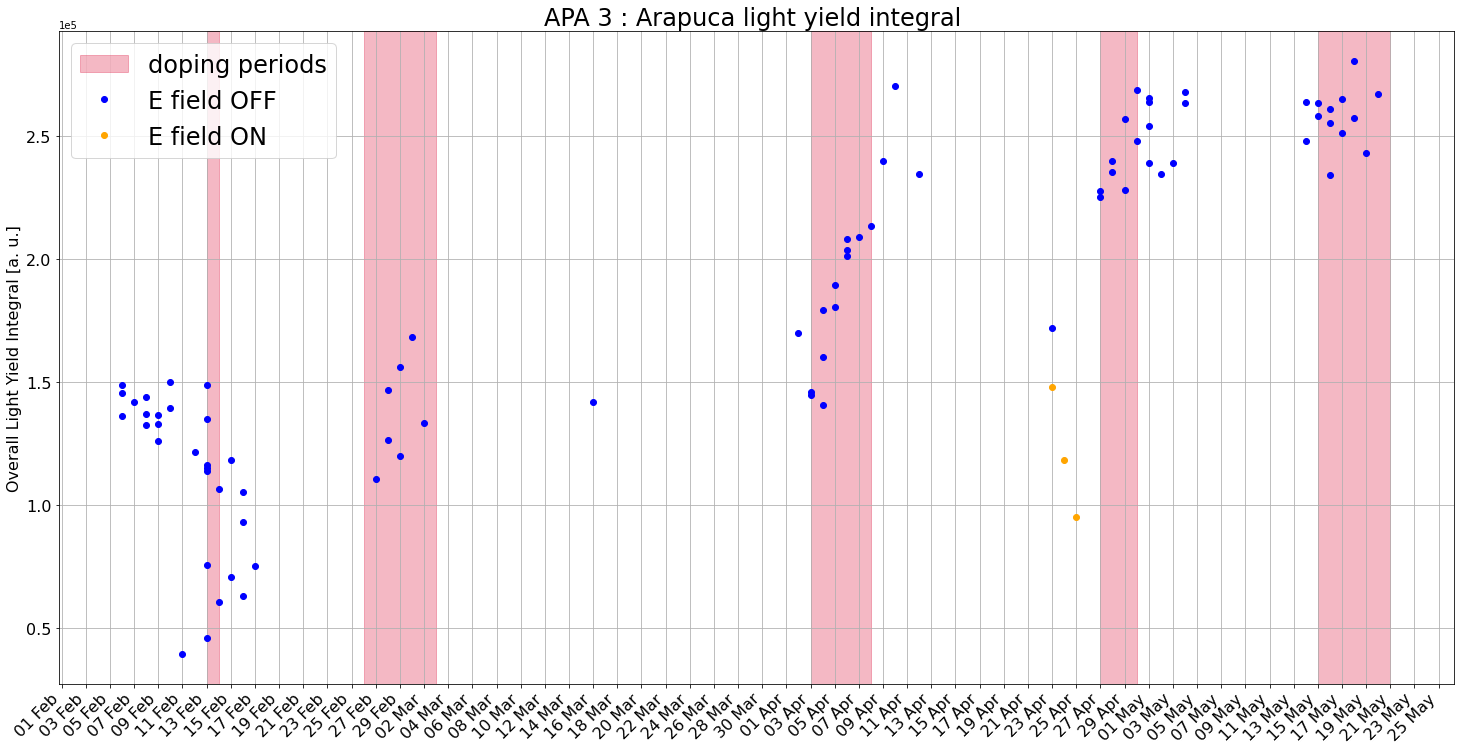

In [271]:
############################################################
#                           APA 3 
############################################################
import matplotlib.dates as mdates
fig = plt.figure(figsize=(25,12))



plt.title('APA 3 : Arapuca light yield integral ', fontsize=24)
plt.errorbar(x=df_apa3_fin_EOFF['Day/time'], y=df_apa3_fin_EOFF['Integral'], fmt='o', color='blue', ecolor='lightgray', elinewidth=3, capsize=0, label = 'E field OFF')

plt.errorbar(x=df_apa3_fin_EON['Day/time'], y=df_apa3_fin_EON['Integral'], fmt='o', color='orange', ecolor='lightgray', elinewidth=3, capsize=0, label = 'E field ON')



plt.ylabel('Overall Light Yield Integral [a. u.]', fontsize=16)
plt.ticklabel_format(axis='y', style="sci", scilimits=(0,0))
plt.xticks(rotation=45, fontsize=16, horizontalalignment="right")
plt.yticks(fontsize=16)

ax = plt.axes()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=2))   #to get a tick every 15 minutes



plt.axvspan(datestr2num('13 Feb'), datestr2num('14 Feb'),    label="doping periods", color="crimson", alpha=0.3)
plt.axvspan(datestr2num('26 Feb'), datestr2num('3 March'),   color="crimson", alpha=0.3)
plt.axvspan(datestr2num('3 April'), datestr2num('8 April'),  color="crimson", alpha=0.3)
plt.axvspan(datestr2num('27 April'), datestr2num('30 April'),color="crimson", alpha=0.3)
plt.axvspan(datestr2num('15th May'), datestr2num('21 May'),  color="crimson", alpha=0.3)


plt.legend(fontsize=24)

plt.grid()
plt.show()
